In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('AAPL.csv')


In [6]:
df.head(5)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [7]:
df.tail(5)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [11]:
df1.shape

(1258,)

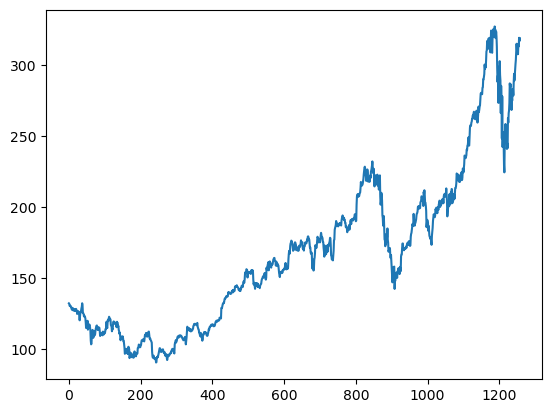

In [13]:
plt.plot(df1)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1.shape

(1258, 1)

In [18]:
df1 

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [19]:
#fe el time series ba2sm el data btare2a mo5tlfa en day3 depend on day2 and day1 train data set 120 130 135 140 134 150 w el test msln 160 190 154 

In [20]:
training_size=int(len(df1)*0.65)#65 percent should be my training size
test_size=len(df1)-training_size

In [21]:
training_size,test_size

(817, 441)

In [22]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [24]:
train_data.shape

(817, 1)

In [25]:
test_data.shape

(441, 1)

In [27]:
#preprocessing time 3ayz ageb el day eli b3deh how many previous day need to be consider lw 3mlt time step b 3 yb2a kda 3ndy 3 features f1 f2 f3 first feature 120 f2 130 f3 125 then my output should be 140 el ms2ol 3n el 3mlya deh el timestep b3d kda 130 125 140 b3dha elmfrod mo3tmd 3la eli ableh fa hyb2a 124 b3ml shift right el f1 f2 f3 dh el xtrain w el output dah el ytrain

In [30]:
def create_dataset(dataset,time_step=1):
    dataX , dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0] #i=0,0,1,2,3,4----99 100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX),np.array(dataY)
        

In [40]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [41]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [42]:
print(X_test)

[[0.52651355 0.52837119 0.53119986 ... 0.26154691 0.25187875 0.26483999]
 [0.52837119 0.53119986 0.53871485 ... 0.25187875 0.26483999 0.27273495]
 [0.53119986 0.53871485 0.5461454  ... 0.26483999 0.27273495 0.2766191 ]
 ...
 [0.81875369 0.84256523 0.84210082 ... 0.92544119 0.91771511 0.9483239 ]
 [0.84256523 0.84210082 0.84936249 ... 0.91771511 0.9483239  0.94064004]
 [0.84210082 0.84936249 0.85835515 ... 0.9483239  0.94064004 0.96635143]]


In [43]:
X_train.shape

(716, 100)

In [44]:
X_test.shape

(340, 100)

In [45]:
y_train.shape

(716,)

In [46]:
y_test.shape

(340,)

In [47]:
# we need to reshape our x_train into 3 dimentions we add one only

In [48]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

In [50]:
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(100, 1)),
    Bidirectional(LSTM(50, return_sequences=True)),
    Bidirectional(LSTM(50)),
    Dense(1)
])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 100, 100)          20800     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 100)          60400     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 141701 (553.52 KB)
Trainable params: 141701 (553.52 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [52]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [53]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100

12/12 [==============================] - 13s 292ms/step - loss: 0.0135 - val_loss: 0.0583
Epoch 2/100
12/12 [==============================] - 1s 106ms/step - loss: 0.0026 - val_loss: 0.0123
Epoch 3/100
12/12 [==============================] - 1s 104ms/step - loss: 0.0014 - val_loss: 0.0069
Epoch 4/100
12/12 [==============================] - 1s 108ms/step - loss: 9.4254e-04 - val_loss: 0.0066
Epoch 5/100
12/12 [==============================] - 1s 124ms/step - loss: 7.1581e-04 - val_loss: 0.0064
Epoch 6/100
12/12 [==============================] - 1s 103ms/step - loss: 6.0047e-04 - val_loss: 0.0063
Epoch 7/100
12/12 [==============================] - 1s 112ms/step - loss: 5.2234e-04 - val_loss: 0.0057
Epoch 8/100
12/12 [==============================] - 1s 119ms/step - loss: 4.7023e-04 - val_loss: 0.0058
Epoch 9/100
12/12 [==============================] - 1s 119ms/step - loss: 4.3030e-04 - val_loss: 0.0049
Epoch 10/100
12/12 [==============================] - 1s 104ms/st

In [68]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 21ms/step


In [69]:
train_predict

array([[0.09315044],
       [0.09278905],
       [0.09324921],
       [0.09643482],
       [0.09907539],
       [0.10352527],
       [0.11208393],
       [0.11341531],
       [0.11242593],
       [0.11748599],
       [0.12320434],
       [0.12596922],
       [0.12986115],
       [0.13440415],
       [0.13665904],
       [0.13613681],
       [0.13512461],
       [0.13310696],
       [0.12575516],
       [0.11857287],
       [0.11248598],
       [0.10345749],
       [0.09940539],
       [0.09666214],
       [0.10067413],
       [0.10733908],
       [0.11422371],
       [0.11760847],
       [0.12132542],
       [0.1224298 ],
       [0.1221645 ],
       [0.12195278],
       [0.119959  ],
       [0.11645952],
       [0.11190387],
       [0.11373135],
       [0.11481916],
       [0.11594984],
       [0.11327791],
       [0.11172356],
       [0.10632857],
       [0.10097371],
       [0.09416419],
       [0.09033348],
       [0.08479203],
       [0.07687429],
       [0.07292575],
       [0.070

In [70]:
test_predict

array([[0.28431517],
       [0.28889897],
       [0.29356363],
       [0.29806063],
       [0.29553396],
       [0.29317525],
       [0.28881675],
       [0.2925018 ],
       [0.29374444],
       [0.292292  ],
       [0.3066482 ],
       [0.32055965],
       [0.33094856],
       [0.34446365],
       [0.35747695],
       [0.36540744],
       [0.3637135 ],
       [0.35884798],
       [0.35202083],
       [0.34830853],
       [0.34488854],
       [0.34397227],
       [0.34380051],
       [0.34527588],
       [0.34879738],
       [0.3505768 ],
       [0.35470068],
       [0.35971776],
       [0.36336714],
       [0.3662323 ],
       [0.36494914],
       [0.36576572],
       [0.36732757],
       [0.3677382 ],
       [0.36609876],
       [0.3615445 ],
       [0.35836074],
       [0.36511055],
       [0.3744656 ],
       [0.38304   ],
       [0.39201286],
       [0.40138826],
       [0.40982172],
       [0.41200963],
       [0.41383108],
       [0.4244034 ],
       [0.42537844],
       [0.420

In [71]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [72]:
train_predict

array([[112.40362 ],
       [112.31801 ],
       [112.42701 ],
       [113.18155 ],
       [113.807   ],
       [114.86099 ],
       [116.8882  ],
       [117.20355 ],
       [116.96921 ],
       [118.16773 ],
       [119.52218 ],
       [120.17707 ],
       [121.098915],
       [122.17497 ],
       [122.70905 ],
       [122.585365],
       [122.34561 ],
       [121.86771 ],
       [120.12637 ],
       [118.42517 ],
       [116.98343 ],
       [114.84494 ],
       [113.88516 ],
       [113.2354  ],
       [114.18568 ],
       [115.764336],
       [117.39503 ],
       [118.19675 ],
       [119.07714 ],
       [119.338715],
       [119.27588 ],
       [119.22573 ],
       [118.75349 ],
       [117.9246  ],
       [116.84555 ],
       [117.278404],
       [117.536064],
       [117.80388 ],
       [117.171005],
       [116.80284 ],
       [115.52499 ],
       [114.25663 ],
       [112.64373 ],
       [111.73639 ],
       [110.42384 ],
       [108.54845 ],
       [107.61319 ],
       [107.0

In [73]:
test_predict

array([[157.68289],
       [158.76862],
       [159.87349],
       [160.93864],
       [160.34016],
       [159.7815 ],
       [158.74913],
       [159.62198],
       [159.9163 ],
       [159.57228],
       [162.97269],
       [166.26776],
       [168.72849],
       [171.92966],
       [175.012  ],
       [176.89041],
       [176.48918],
       [175.33673],
       [173.71965],
       [172.84036],
       [172.0303 ],
       [171.81326],
       [171.7726 ],
       [172.12204],
       [172.95615],
       [173.37762],
       [174.3544 ],
       [175.54276],
       [176.40714],
       [177.08578],
       [176.78186],
       [176.97527],
       [177.3452 ],
       [177.44246],
       [177.05415],
       [175.97542],
       [175.22133],
       [176.82008],
       [179.03593],
       [181.06685],
       [183.19217],
       [185.41283],
       [187.41037],
       [187.9286 ],
       [188.36003],
       [190.8642 ],
       [191.09514],
       [189.97383],
       [188.00739],
       [186.90105],


In [74]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.1077965858161

In [75]:
math.sqrt(mean_squared_error(ytest,test_predict))


253.68858057534558

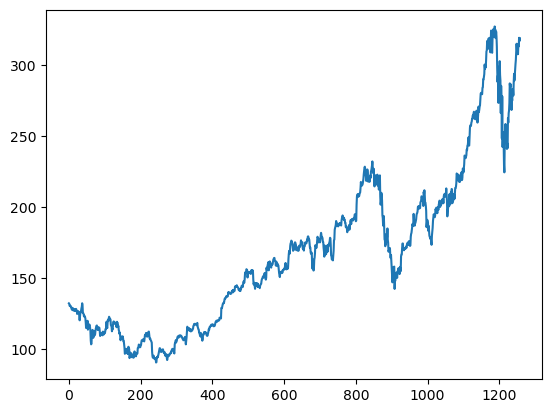

In [80]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
plt.plot(scaler.inverse_transform(df1))


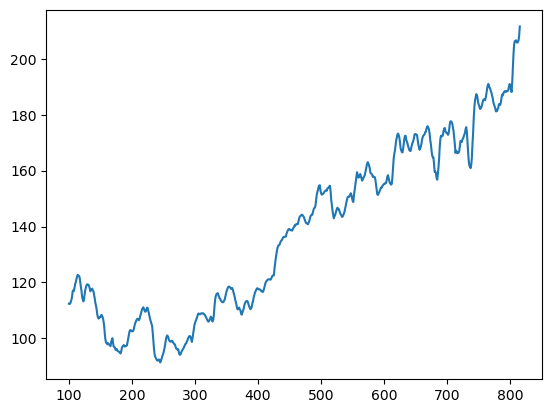

In [81]:
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(trainPredictPlot)


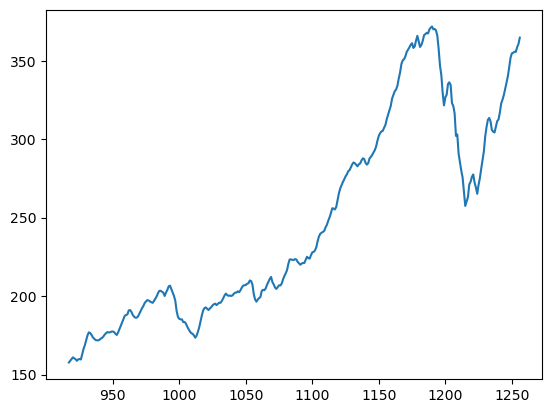

In [83]:
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(testPredictPlot)

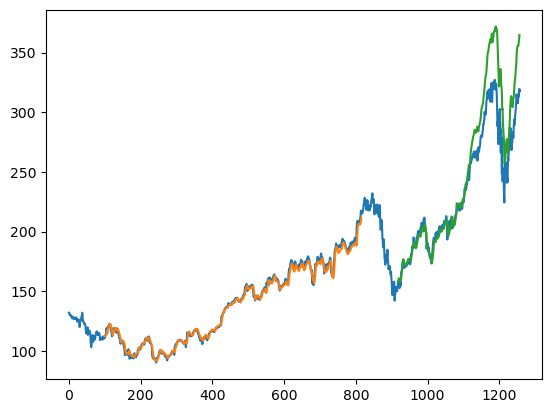

In [77]:
### Plotting 
# shift train predictions for plotting
look_back=100 #time step =100
trainPredictPlot = np.empty_like(df1) #nan values based on the size of dataframe
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1)) #lazem a3ml el inverse transform 34an arg3ha laslha
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
#green test predicted & blue full data set & orange training predict